In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


<Axes: >

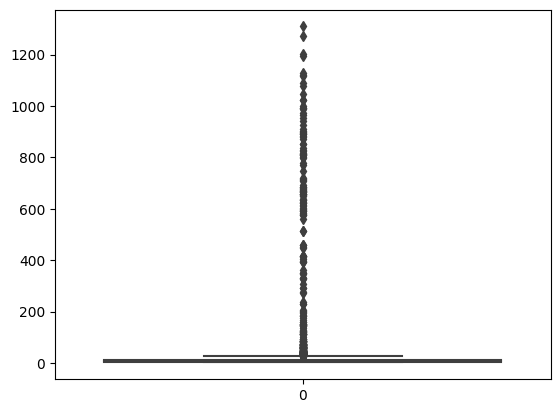

In [ ]:
sns.boxplot(data=df['kurt'])

array([[<Axes: title={'center': 'meanfreq'}>,
        <Axes: title={'center': 'sd'}>,
        <Axes: title={'center': 'median'}>,
        <Axes: title={'center': 'Q25'}>],
       [<Axes: title={'center': 'Q75'}>, <Axes: title={'center': 'IQR'}>,
        <Axes: title={'center': 'skew'}>,
        <Axes: title={'center': 'kurt'}>],
       [<Axes: title={'center': 'sp.ent'}>,
        <Axes: title={'center': 'sfm'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'centroid'}>],
       [<Axes: title={'center': 'meanfun'}>,
        <Axes: title={'center': 'minfun'}>,
        <Axes: title={'center': 'maxfun'}>,
        <Axes: title={'center': 'meandom'}>],
       [<Axes: title={'center': 'mindom'}>,
        <Axes: title={'center': 'maxdom'}>,
        <Axes: title={'center': 'dfrange'}>,
        <Axes: title={'center': 'modindx'}>]], dtype=object)

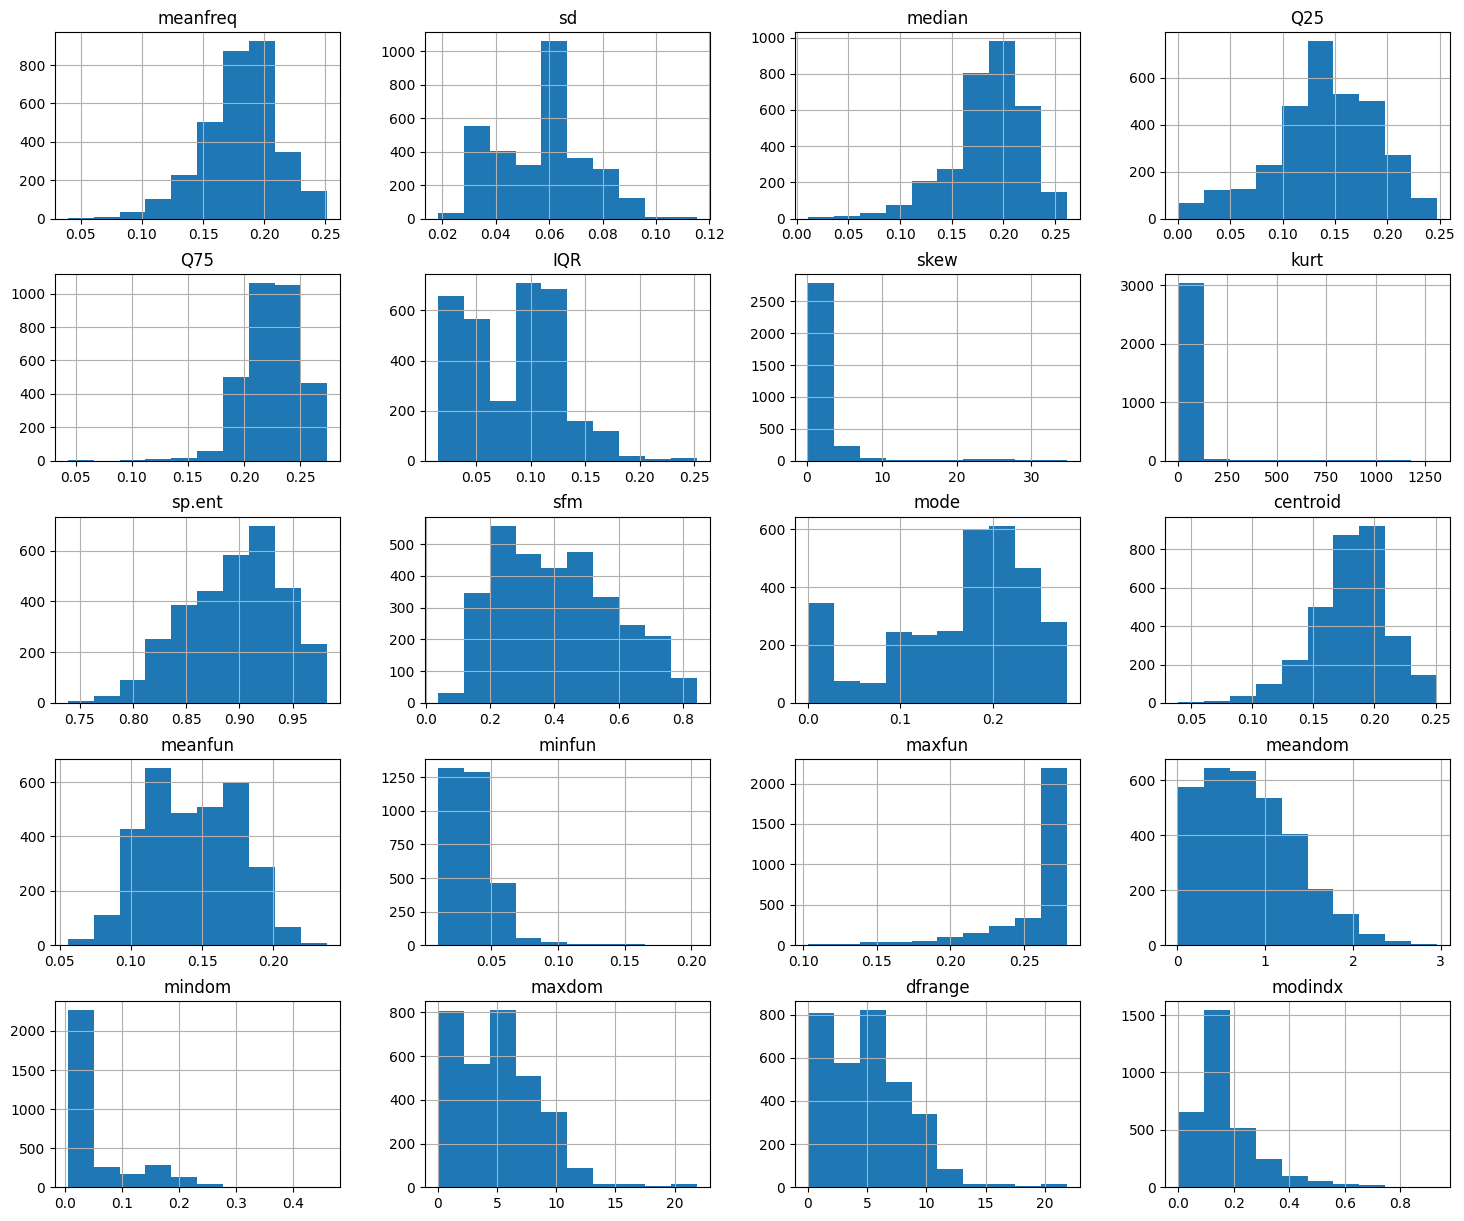

In [ ]:
df.hist(figsize=(18,15))

In [ ]:
X = df.iloc[:,:-1]
X

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002


In [ ]:
y = df.label
y

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object

In [ ]:
y.value_counts()

male      1584
female    1584
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

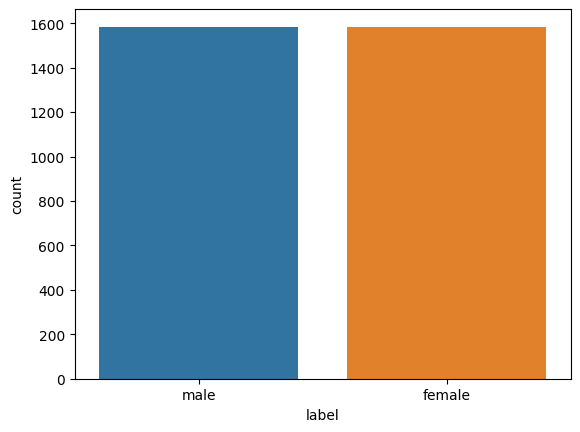

In [ ]:
sns.countplot(x='label',data=df)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=20)

In [ ]:
svm1 = SVC()
svm1.fit(X_train,y_train)
print('Training score: ',svm1.score(X_train,y_train)*100)
print('Testing score: ',svm1.score(X_test,y_test)*100)

Training score:  67.56670902160101
Testing score:  75.0


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv1 = cross_val_score(svm1,X,y,cv=10,scoring='accuracy')
cv1

array([0.51104101, 0.5488959 , 0.63722397, 0.69716088, 0.73501577,
       0.76971609, 0.75394322, 0.67192429, 0.61075949, 0.65189873])

In [ ]:
print('Average accuracy of 10 fold : ',np.mean(cv1))

Average accuracy of 10 fold :  0.658757936349479


In [ ]:
acc_2 = []
for i in range(1,26):
  svm2 = SVC(C=i)
  svm2.fit(X_train,y_train)
  acc_2.append(svm2.score(X_train,y_train)*100)
acc_2

[67.56670902160101,
 67.75730622617534,
 67.8843710292249,
 67.9161372299873,
 68.13850063532402,
 68.1702668360864,
 68.13850063532402,
 68.42439644218553,
 68.64675984752223,
 68.58322744599747,
 68.64675984752223,
 68.71029224904701,
 68.61499364675984,
 68.64675984752223,
 68.64675984752223,
 68.7420584498094,
 68.7738246505718,
 68.99618805590852,
 69.12325285895807,
 68.96442185514613,
 69.0279542566709,
 69.09148665819568,
 68.93265565438374,
 69.05972045743329,
 69.21855146124524]

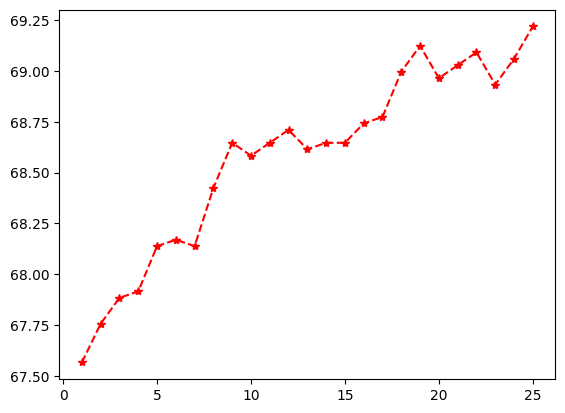

In [ ]:
plt.plot(range(1,26),acc_2,'--*r')

In [ ]:
# lets scale X_train and X_test
sc = StandardScaler()
new_xtrain = sc.fit_transform(X_train)
new_xtest = sc.transform(X_test)

In [ ]:
svm3 = SVC()
svm3.fit(new_xtrain,y_train)
svm3.score(new_xtrain,y_train)*100

98.53875476493012

In [ ]:
# before scaling
print('Training score: ',svm1.score(X_train,y_train)*100)
print('Testing score: ',svm1.score(X_test,y_test)*100)

Training score:  67.56670902160101
Testing score:  75.0


In [ ]:
#after scaling
print('Training score: ',svm3.score(new_xtrain,y_train)*100)
print('Testing score: ',svm3.score(new_xtest,y_test)*100)

Training score:  98.53875476493012
Testing score:  90.0


In [ ]:
X_new = sc.transform(X)
X_new

array([[-4.04984813,  0.42645445, -4.22613039, ..., -1.43365107,
        -1.4213389 , -1.45277823],
       [-3.8415577 ,  0.61090823, -4.00047026, ..., -1.42031572,
        -1.40799971, -1.01220746],
       [-3.46339733,  1.603838  , -4.09704995, ..., -1.43142851,
        -1.4191157 , -1.06343662],
       ...,
       [-1.29811017,  2.32325804, -0.05222622, ..., -0.60019218,
        -0.58763928,  0.17751591],
       [-1.24451411,  2.01249533, -0.01797391, ..., -0.41349739,
        -0.40089057,  1.15057267],
       [-0.51372311,  2.14805302, -0.07113658, ..., -1.27807207,
        -1.26571497,  1.47701737]])

In [ ]:
cv2 = cross_val_score(svm3,X_new,y,cv=10,scoring = 'accuracy')
cv2

array([0.93375394, 0.95583596, 0.96845426, 0.96214511, 0.96529968,
       0.99684543, 0.99053628, 0.98422713, 0.91455696, 0.99367089])

In [ ]:
svm4 = SVC(C=20)
svm4.fit(new_xtrain,y_train)
svm4.score(new_xtrain,y_train)*100

99.61880559085134

In [ ]:
pred = svm4.predict(new_xtest)
pred

array(['female', 'female', 'male', 'male', 'female', 'female', 'female',
       'female', 'male', 'male', 'female', 'male', 'male', 'male',
       'female', 'female', 'male', 'female', 'male', 'male'], dtype=object)

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[10,  1],
       [ 0,  9]])

<Axes: >

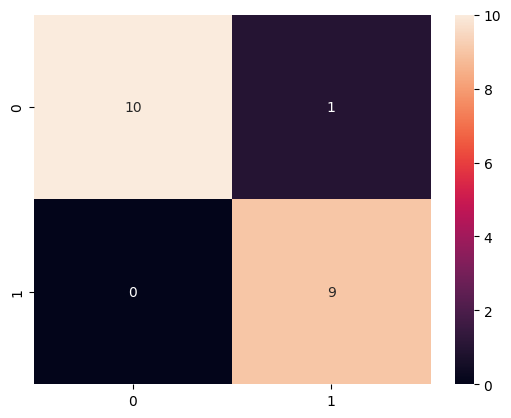

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      female       1.00      0.91      0.95        11
        male       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

